In [ ]:
# 股票市场指数 Ticker 注释
# 道琼斯工业平均指数 (DJIA): ^DJI
# 标准普尔500指数 (S&P 500): ^GSPC
# 纳斯达克综合指数 (NASDAQ Composite): ^IXIC
# 上证综合指数 (SSE Composite Index): 000001.SS
# 恒生指数 (HSI): ^HSI
# 日经225指数 (Nikkei 225): ^N225
# 德国DAX指数: ^GDAXI
# 英国富时100指数 (FTSE 100): ^FTSE
# 法国CAC 40指数: ^FCHI
# 澳洲ASX 200指数: ^AXJO

# ./fin/fin.py
import yfinance as yf

def get_stock_history_data(ticker):
    if not ticker:
        raise ValueError("Ticker parameter is required")
    try:
        dat = yf.Ticker(ticker)
        history_data = dat.history(period='max')
        history_dict = history_data.reset_index().to_dict(orient='records')
        
        return {"ticker": ticker, "history": history_dict}
    except Exception as e:
        raise RuntimeError(f"Error fetching stock data: {e}")
get_stock_history_data("^GSPC")

{'ticker': '^GSPC',
 'history': [{'Date': Timestamp('1927-12-30 00:00:00-0500', tz='America/New_York'),
   'Open': 17.65999984741211,
   'High': 17.65999984741211,
   'Low': 17.65999984741211,
   'Close': 17.65999984741211,
   'Volume': 0,
   'Dividends': 0.0,
   'Stock Splits': 0.0},
  {'Date': Timestamp('1928-01-03 00:00:00-0500', tz='America/New_York'),
   'Open': 17.760000228881836,
   'High': 17.760000228881836,
   'Low': 17.760000228881836,
   'Close': 17.760000228881836,
   'Volume': 0,
   'Dividends': 0.0,
   'Stock Splits': 0.0},
  {'Date': Timestamp('1928-01-04 00:00:00-0500', tz='America/New_York'),
   'Open': 17.719999313354492,
   'High': 17.719999313354492,
   'Low': 17.719999313354492,
   'Close': 17.719999313354492,
   'Volume': 0,
   'Dividends': 0.0,
   'Stock Splits': 0.0},
  {'Date': Timestamp('1928-01-05 00:00:00-0500', tz='America/New_York'),
   'Open': 17.549999237060547,
   'High': 17.549999237060547,
   'Low': 17.549999237060547,
   'Close': 17.549999237060547,

Data is not stationary. Differencing is required.


c:\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python313\Lib\site-packages\statsmodels\tsa\base\

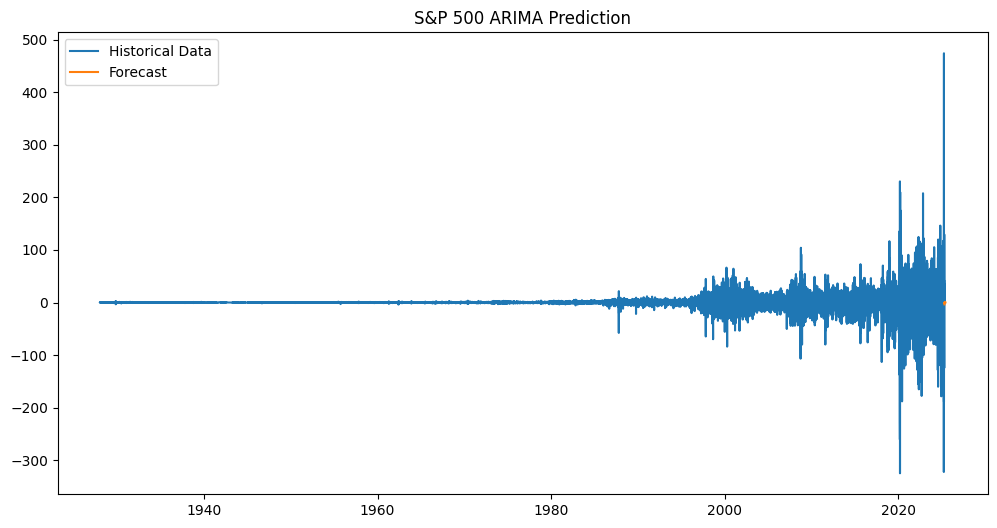

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Fetch historical data for S&P 500
data = get_stock_history_data("^GSPC")
history = pd.DataFrame(data["history"])
history["Date"] = pd.to_datetime(history["Date"])
history.set_index("Date", inplace=True)

# Extract the closing prices
closing_prices = history["Close"]

# Check stationarity (ADF Test)
result = adfuller(closing_prices)
if result[1] > 0.05:
    print("Data is not stationary. Differencing is required.")
    closing_prices = closing_prices.diff().dropna()

# Fit ARIMA model (ARMA is a special case of ARIMA with no differencing)
model = ARIMA(closing_prices, order=(2, 0, 2))  # Adjust order as needed
arma_result = model.fit()

# Forecast future values
forecast_steps = 30
forecast = arma_result.forecast(steps=forecast_steps)

# Plot historical data and forecast
plt.figure(figsize=(12, 6))
# plt.plot(closing_prices, label="Historical Data")
plt.plot(pd.date_range(closing_prices.index[-1], periods=forecast_steps, freq="B"), forecast, label="Forecast")
plt.legend()
plt.title("S&P 500 ARIMA Prediction")
plt.show()